In [73]:
import networkx as nx
import dwave_networkx as dnx
from hybrid.reference.kerberos import KerberosSampler
import matplotlib.pyplot as plt

import pprint

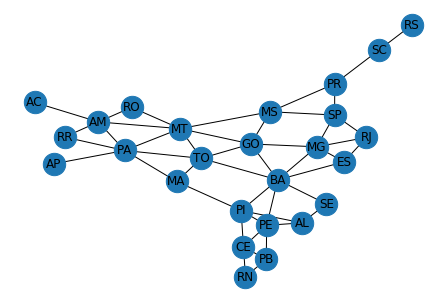

In [74]:
#G = nx.read_adjlist('usa.adj', delimiter = ',')
G = nx.read_adjlist('brasil.adj', delimiter = ',')

nx.draw(G, pos=nx.spring_layout(G), with_labels=True, node_size=500, cmap=plt.cm.rainbow)

In [76]:
qubo = dnx.min_vertex_color_qubo(G)

pprint.pprint(qubo)

{(('AC', 0), ('AC', 0)): -1,
 (('AC', 0), ('AC', 1)): 2,
 (('AC', 0), ('AC', 2)): 2,
 (('AC', 0), ('AC', 3)): 2,
 (('AC', 0), ('AC', 4)): 2,
 (('AC', 1), ('AC', 1)): -1,
 (('AC', 1), ('AC', 2)): 2,
 (('AC', 1), ('AC', 3)): 2,
 (('AC', 1), ('AC', 4)): 2,
 (('AC', 2), ('AC', 2)): -1,
 (('AC', 2), ('AC', 3)): 2,
 (('AC', 2), ('AC', 4)): 2,
 (('AC', 3), ('AC', 3)): -0.6666666666666667,
 (('AC', 3), ('AC', 4)): 2,
 (('AC', 4), ('AC', 4)): -0.33333333333333337,
 (('AL', 0), ('AL', 0)): -1,
 (('AL', 0), ('AL', 1)): 2,
 (('AL', 0), ('AL', 2)): 2,
 (('AL', 0), ('AL', 3)): 2,
 (('AL', 0), ('AL', 4)): 2,
 (('AL', 1), ('AL', 1)): -1,
 (('AL', 1), ('AL', 2)): 2,
 (('AL', 1), ('AL', 3)): 2,
 (('AL', 1), ('AL', 4)): 2,
 (('AL', 2), ('AL', 2)): -1,
 (('AL', 2), ('AL', 3)): 2,
 (('AL', 2), ('AL', 4)): 2,
 (('AL', 3), ('AL', 3)): -0.6666666666666667,
 (('AL', 3), ('AL', 4)): 2,
 (('AL', 4), ('AL', 4)): -0.33333333333333337,
 (('AM', 0), ('AC', 0)): 1,
 (('AM', 0), ('AM', 0)): -1,
 (('AM', 0), ('AM', 1))

In [75]:
coloring = dnx.min_vertex_coloring(G, sampler=KerberosSampler(), chromatic_ub=4, max_iter=10, convergence=3)
set(coloring.values())

{0, 1, 2}

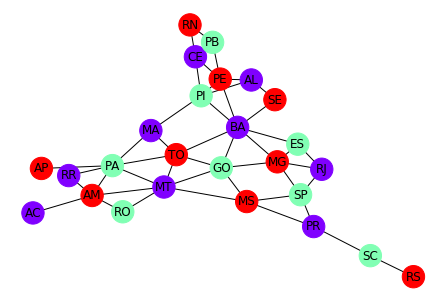

In [84]:
node_colors = [coloring.get(node) for node in G.nodes()]

# for USA, change to nx.shell_layout
#if dnx.is_vertex_coloring(G, coloring):  
    #nx.draw(G, pos=nx.shell_layout(G, nlist = [list(G.nodes)[x:x+10] for x in range(0, 50, 10)] + [[list(G.nodes)[50]]]), with_labels=True, node_color=node_colors, node_size=400, cmap=plt.cm.rainbow)

if dnx.is_vertex_coloring(G, coloring):  
    nx.draw(G, pos=nx.spring_layout(G), with_labels=True, node_color=node_colors, node_size=500, cmap=plt.cm.rainbow)
    
#plt.show()